In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy import optimize
import scipy.optimize 
%matplotlib inline

def find_corr_number( array1, array2, element):
    i= np.where(array1== element)
    return array2[i]
def f_prim(x,a0,a1,a2,a3,a4):
    if (x<= 0):
        return 0
    else:
        return np.exp(a0+a1*np.log(x)+a2*np.log(x)**2+a3*np.log(x)**3+a4*np.log(x)**4)
def f_Sec(x,a0,a1,a2,a3,a4):
    return np.exp(a0+a1*np.log(x)+a2*np.log(x)**2+a3*np.log(x)**3+a4*np.log(x)**4)
def Stopping_Power_Al(Energy):
    return f(Energy,7.10324628e+00,  -1.94662466e-01,  -1.46767221e-01,   1.20252433e-03, 1.79847844e-03)
def Stopping_Power(Energy):    #dE/dx
    return f(Energy,7.51161379e+00, -1.95417699e-01, -1.94390614e-01, -1.24903581e-04,2.79996333e-03)
def New_Stopping_power(Energy,length,dichte):
     Stopping_Power(Energy)*length*dichte

dichte_luft = 1.20479E-03
dichte_Al = 2.69890E+00
dichte_Mylar=1.40000E+00

dry_air = 'drayair.pl'
Al = 'Aldata.pl'
Mylar = 'Mylar.pl'
dary_air_data = np.loadtxt(dry_air, comments='#')
Al_data = np.loadtxt(Al, comments='#')
Mylar_data = np.loadtxt(Mylar, comments='#')

Energy_dry_air = dary_air_data[:,0] #kanal
Stopping_Power_dry_air = dary_air_data[:,1] #Energie
Range_CSDA_dry_air = dary_air_data[:,2]

Energy_Al = Al_data[:,0] #kanal
Stopping_Power_Al = Al_data[:,1] #Energie
Range_CSDA_Al = Al_data[:,2]

Energy_Mylar = Mylar_data[:,0] #kanal
Stopping_Power_Mylar = Mylar_data[:,1] #Energie
Range_CSDA_Mylar = Mylar_data[:,2]

popt_air, pcov_air = curve_fit(f_Sec, Energy_dry_air, Stopping_Power_dry_air,p0=[-2.4,7.6,-0.3,-0.02,0.02])
popt_Al, pcov_Al = curve_fit(f_Sec, Energy_Al, Stopping_Power_Al,p0=[-2.4,7.6,-0.3,-0.02,0.02])
popt_Mylar, pcov_Mylar = curve_fit(f_Sec, Energy_Mylar, Stopping_Power_Mylar,p0=[-2.4,7.6,-0.3,-0.02,0.02])

def Stopping_Power_Air(Energy):
    return f_prim(Energy,*popt_air)
def Stopping_Power_Al(Energy):
    return f_prim(Energy,*popt_Al)
def Stopping_Power_Mylar(Energy):
    return f_prim(Energy,*popt_Mylar)
def Stopping_Power_step_Air(Energy , length, n):
    multiplicator = dichte_luft * length
    for i in range(n):
        Energy = Energy - Stopping_Power_Air(Energy)*multiplicator
    return Energy
def Stopping_Power_step_Al(Energy , length, n):
    multiplicator = dichte_Al * length
    for i in range(n):
        Energy = Energy - Stopping_Power_Al(Energy)*multiplicator
    return Energy
def Stopping_Power_step_Mylar(Energy, length, n):
    multiplicator = dichte_Mylar * length
    for i in range(n):
        Energy = Energy - Stopping_Power_Mylar(Energy)*multiplicator
    return Energy
def E_loss( E_in, d, Stopping_Power_von_Material):
    if Stopping_Power_von_Material == 'Air':
        return Stopping_Power_step_Air(E_in, 3e-2, int(d/3e-2))
    elif Stopping_Power_von_Material == 'Al':
        return Stopping_Power_step_Al(E_in, 1e-5, int(d/1e-5)) 
    elif Stopping_Power_von_Material == 'Mylar':
        return Stopping_Power_step_Mylar(E_in, 1e-5, int(d/1e-5)) 
    else:
        print('Not defined')
def Orange_direct(E_in):
    E_1= E_loss( E_in, 0.43, 'Air') #3.3mm + 0.1mm luft
    E_2= E_loss( E_1, 1e-4, 'Al' ) #1u Al
    E_3= E_loss( E_2, 6e-4, 'Mylar') # 6um Mylar
    E_4= E_loss( E_3, 0.15, 'Air' ) # 1.5 mm luft
    return E_4
def Orange(E_in, theta):
    E_1= E_loss( E_in, 0.43/np.cos(theta*np.pi/180), 'Air') #3.3mm + 0.1mm luft
    E_2= E_loss( E_1, 1e-4/np.cos(theta*np.pi/180), 'Al' ) #1u Al
    E_3= E_loss( E_2, 6e-4/np.cos(theta*np.pi/180), 'Mylar') # 6um Mylar
    E_4= E_loss( E_3, 0.15/np.cos(theta*np.pi/180), 'Air' ) # 1.5 mm luft
    return E_4
def limit_theta(Energy):
    n= 0
    while(Orange(Energy,n)>=0.1):
#        print(Orange(Energy,n))
        n=n+.1
    return n-.1
#limit_theta(3)
def random_theta(Energy, Anzahl):
    return np.random.uniform(0,limit_theta(Energy),Anzahl)
def random_End_Energy(Energy,Anzahl):
    a = []
    for i in range(Anzahl):
        result= Orange(Energy,random_theta(Energy,1))
        a.append(result)
    return np.asarray(a)

In [39]:
def histo1(Energy):
    plt.xlabel('Energie')
    plt.ylabel('Anzahl')
    n, bins, patches = plt.hist(random_End_Energy(Energy,4), 30, density=False, facecolor='k', alpha=1)
    #plt.savefig('5-4MeV.png')
def histo2(Energy):
    plt.xlabel('Energie')
    plt.ylabel('Anzahl')
    n, bins, patches = plt.hist(random_End_Energy(Energy,10000), 30, density=False, facecolor='k', alpha=1)
    plt.savefig('4MeV.png')
def histo3(Energy):
    plt.xlabel('Energie')
    plt.ylabel('Anzahl')
    n, bins, patches = plt.hist(random_End_Energy(Energy,10000), 30, density=False, facecolor='k', alpha=1)
    plt.savefig('3MeV.png')
def histo4(Energy):
    plt.xlabel('Energie')
    plt.ylabel('Anzahl')
    n, bins, patches = plt.hist(random_End_Energy(Energy,10000), 30, density=False, facecolor='k', alpha=1)
    plt.savefig('2_7MeV.png')

--- 2.222501516342163 seconds ---


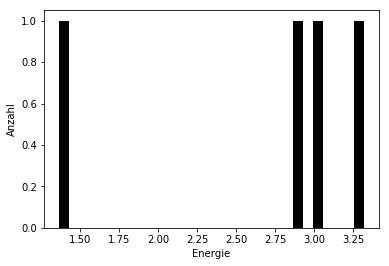

In [40]:
import time
start_time = time.time()
histo1(5)
print("--- %s seconds ---" % (time.time() - start_time))

In [6]:
from multiprocessing import Process


def Main():
    Energy1 = 5.4
    Energy2 = 4
    Energy3 = 3
    Energy4 = 2.7
    
    p1 = Process(target=histo1,args=(Energy1,))
    p2 = Process(target=histo2,args=(Energy2,))
    p3 = Process(target=histo3,args=(Energy3,))
    p4 = Process(target=histo4,args=(Energy4,))
    
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    
    p1.join()
    p2.join()
    p3.join()
    p4.join()
if __name__ == '__Main__':
    Main()

In [7]:
Main()

Process Process-6:
  File "/home/ali/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process Process-5:
Traceback (most recent call last):
  File "/home/ali/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ali/miniconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-2e66346cbf0b>", line 4, in histo1
    n, bins, patches = plt.hist(random_End_Energy(Energy,5000), 30, density=False, facecolor='k', alpha=1)
Traceback (most recent call last):
  File "<ipython-input-1-710f48790fb7>", line 108, in random_End_Energy
    result= Orange(Energy,random_theta(Energy,1))
  File "<ipython-input-1-710f48790fb7>", line 104, in random_theta
    return np.random.uniform(0,limit_theta(Energy),Anzahl)
  File "<ipython-input-1-710f48790fb7>", line 98, in limit_theta
    while(Orange(Energy,n)>=0.1):
  File "<ipython-input-

KeyboardInterrupt: 

  File "<ipython-input-5-2e66346cbf0b>", line 9, in histo2
    n, bins, patches = plt.hist(random_End_Energy(Energy,5000), 30, density=False, facecolor='k', alpha=1)
  File "<ipython-input-1-710f48790fb7>", line 108, in random_End_Energy
    result= Orange(Energy,random_theta(Energy,1))
  File "<ipython-input-1-710f48790fb7>", line 104, in random_theta
    return np.random.uniform(0,limit_theta(Energy),Anzahl)
  File "<ipython-input-1-710f48790fb7>", line 98, in limit_theta
    while(Orange(Energy,n)>=0.1):
  File "<ipython-input-1-710f48790fb7>", line 68, in Stopping_Power_step_Al
    Energy = Energy - Stopping_Power_Al(Energy)*multiplicator
  File "<ipython-input-1-710f48790fb7>", line 57, in Stopping_Power_Al
    return f_prim(Energy,*popt_Al)
  File "<ipython-input-1-710f48790fb7>", line 17, in f_prim
    return np.exp(a0+a1*np.log(x)+a2*np.log(x)**2+a3*np.log(x)**3+a4*np.log(x)**4)
KeyboardInterrupt
  File "<ipython-input-1-710f48790fb7>", line 91, in Orange
    E_1= E_loss( E_in,